In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [12]:
from sklearn import datasets
dataset=datasets.load_iris()

data=pd.DataFrame(dataset['data'],columns=['Petal Length','Petal Width','Sepal Length','Sepal Width'])
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

In [16]:
data.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
data.isnull().sum()

Petal Length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [23]:
modData = data.append({'Petal Length' : np.nan , 'Petal Width' : 3.6, 'Sepal Length': 0,

            'Sepal Width': 0.2, 'Species': 'setosa' } , ignore_index=True)


In [24]:
modData.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,151.000000,151.000000,151.000000
mean,5.843333,3.060927,3.733113,1.192715
std,0.828066,0.436650,1.785785,0.764033
min,4.300000,2.000000,0.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
modData.isnull().sum()

Petal Length    1
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [27]:
print('Columns with missing values')

print(modData.isnull().sum())

print('\n Columns with zero values')

print((modData[['Petal Length','Petal Width','Sepal Length','Sepal Width','Species']]==0).sum())

Columns with missing values
Petal Length    1
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

 Columns with zero values
Petal Length    0
Petal Width     0
Sepal Length    1
Sepal Width     0
Species         0
dtype: int64


In [28]:
modData[['Petal Length',

     'Petal Width',

     'Sepal Length',

     'Sepal Width','Species']] = modData[['Petal Length',

                       'Petal Width',

                       'Sepal Length',

                       'Sepal Width',

                       'Species']].replace(0, np.NaN)

In [29]:
print('Columns with missing values')

print(modData.isnull().sum())

Columns with missing values
Petal Length    1
Petal Width     0
Sepal Length    1
Sepal Width     0
Species         0
dtype: int64


In [30]:
modData.fillna(modData.mean(), inplace=True)
print(modData.isnull().sum())

Petal Length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64


In [35]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
PCA_df = pd.read_csv(url, names=['Sepal Length','Sepal Width','Petal Length','Petal Width','target'])

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Separating out the features

x = PCA_df.loc[:, features].values

# Separating out the target

y = PCA_df.loc[:,['target']].values

# Standardizing the features

x = StandardScaler().fit_transform(x)

print (x)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents ,
                        columns = ['principal components 1','principal components 2'])

In [41]:
print(principalDf)

     principal components 1  principal components 2
0                 -2.264542                0.505704
1                 -2.086426               -0.655405
2                 -2.367950               -0.318477
3                 -2.304197               -0.575368
4                 -2.388777                0.674767
..                      ...                     ...
145                1.870522                0.382822
146                1.558492               -0.905314
147                1.520845                0.266795
148                1.376391                1.016362
149                0.959299               -0.022284

[150 rows x 2 columns]


In [40]:
finaldf = pd.concat([principalDf,PCA_df[['target']]],axis=1)

In [42]:
print(finaldf)

     principal components 1  principal components 2          target
0                 -2.264542                0.505704     Iris-setosa
1                 -2.086426               -0.655405     Iris-setosa
2                 -2.367950               -0.318477     Iris-setosa
3                 -2.304197               -0.575368     Iris-setosa
4                 -2.388777                0.674767     Iris-setosa
..                      ...                     ...             ...
145                1.870522                0.382822  Iris-virginica
146                1.558492               -0.905314  Iris-virginica
147                1.520845                0.266795  Iris-virginica
148                1.376391                1.016362  Iris-virginica
149                0.959299               -0.022284  Iris-virginica

[150 rows x 3 columns]


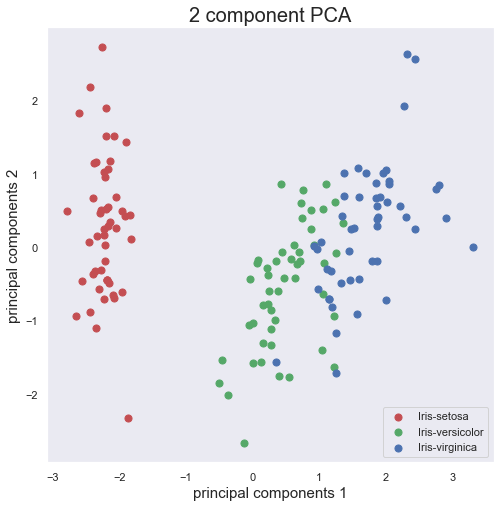

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline

#sns.set(color_codes=True)



fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('principal components 1', fontsize = 15)

ax.set_ylabel('principal components 2', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):

  indicesToKeep = finaldf['target'] == target

  ax.scatter(finaldf.loc[indicesToKeep, 'principal components 1']

        , finaldf.loc[indicesToKeep, 'principal components 2']

        , c = color

        , s = 50)

ax.legend(targets)

ax.grid()